# 4. Multiple stationary bodies
Adding multiple bodies to a problem is easy, using the concepts of a `BodyList`
and `RigidTransformList`.

In [1]:
using ViscousFlow

In [2]:
using Plots

In this example, we will set up a problem with three cylinders arranged in a
formation in a free stream.

In [3]:
Re = 200 # Reynolds number
U = 1.0 # Free stream velocity
U∞ = (U,0.0);

Set up the domain, grid spacing, and time step size

In [4]:
xlim = (-2.0,4.0)
ylim = (-2.0,2.0)
Δx, Δt = setstepsizes(Re,gridRe=4)

(0.02, 0.01)

### Set up bodies
We start by initializing a `BodyList` and an associated `RigidTransformList`.
Each member of the `RigidTransformList` will be used to place the respective body in
the correct position and orientation.

In [5]:
bl = BodyList()
tl = RigidTransformList()

RigidTransformList(RigidTransform[])

Place the first body at (-1,0)

In [6]:
push!(bl,Circle(0.5,1.5Δx))
push!(tl,RigidTransform((-1.,0.),0.));

Place the second body at (1,-1)

In [7]:
push!(bl,Circle(0.5,1.5Δx))
push!(tl,RigidTransform((1.,-1.),0.));

and place the third body at (1,1)

In [8]:
push!(bl,Circle(0.5,1.5Δx))
push!(tl,RigidTransform((1.,1.),0.))

3-element Array{RigidTransform,1}:
 Rigid-body transform
  Translation: (-1.0,0.0)
  Rotation angle (rad): 0.0

 Rigid-body transform
  Translation: (1.0,-1.0)
  Rotation angle (rad): 0.0

 Rigid-body transform
  Translation: (1.0,1.0)
  Rotation angle (rad): 0.0


Perform the actual transformation. Note that this operation works `in-place`:

In [9]:
tl(bl)

3-element Array{Ellipse{104},1}:
 Circular body with 104 points and radius 0.5
   Current position: (-1.0,0.0)
   Current angle (rad): 0.0

 Circular body with 104 points and radius 0.5
   Current position: (1.0,-1.0)
   Current angle (rad): 0.0

 Circular body with 104 points and radius 0.5
   Current position: (1.0,1.0)
   Current angle (rad): 0.0


#### Plot the initial configuration of the bodies
Just to check they are in the right places

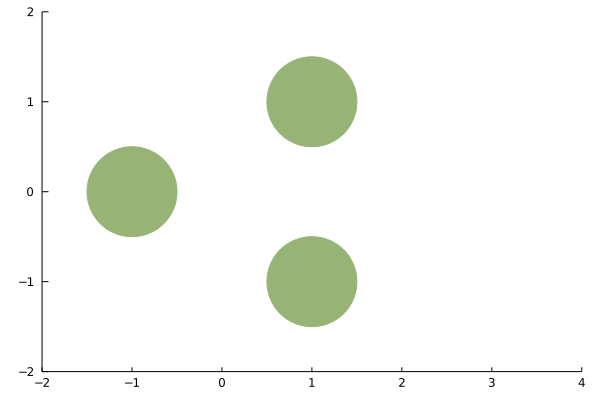

In [10]:
plot(bl,xlim=xlim,ylim=ylim)

### Construct the system structure
We construct the system with the same syntax as for a single body:

In [11]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,bl,freestream = U∞)

External flow Navier-Stokes system on a grid of size 308 x 208 and 312 static immersed points
   Static freestream = (1.0, 0.0)
   3 bodies


In [12]:
u0 = newstate(sys)
tspan = (0.0,10.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Dual nodes in a (nx = 308, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 308, ny = 208), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

### Solve
Here, we run it for only a little while, just to demonstrate:

In [13]:
@time step!(integrator,0.5)

 16.142534 seconds (126.16 M allocations: 4.923 GiB, 5.64% gc time)


### Examine
Let's make an animation

┌ Info: Saved animation to 
│   fn = /var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/jl_LT5cAB.gif
└ @ Plots /Users/jeff/.julia/packages/Plots/lmp2A/src/animation.jl:104


Plots.AnimatedGif("/var/folders/1s/lds3nd1s7xn4mgf0vxqwg0kr0000gn/T/jl_LT5cAB.gif")
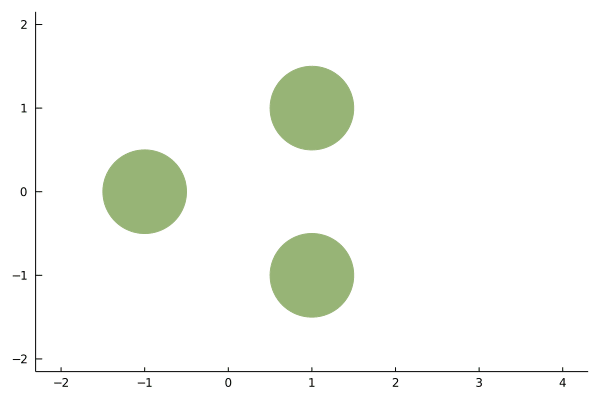

In [14]:
sol = integrator.sol;
@gif for (u,t) in zip(sol.u,sol.t)
    plot(vorticity(u,sys,t),sys,clim=(-10,10),levels=range(-10,10,length=30), color = :RdBu)
end every 5

Now we will examine the force on each body

In [15]:
fx1, fy1 = force(sol,sys,1)
fx2, fy2 = force(sol,sys,2)
fx3, fy3 = force(sol,sys,3);

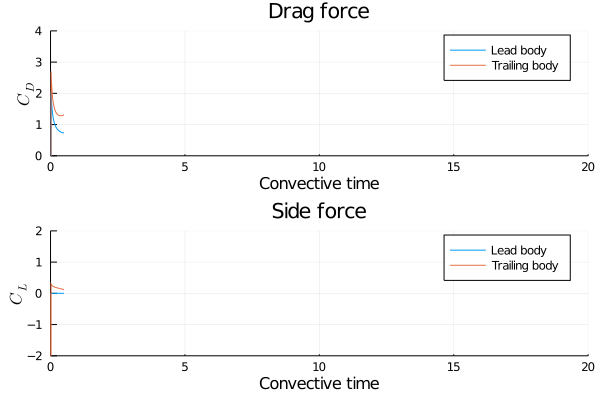

In [16]:
plt = plot(layout = (2,1), size = (600, 400))
plot!(plt[1],sol.t,2*fx1,xlim=(0,20),ylim=(0,4),xlabel="Convective time",ylabel="\$C_D\$",label="Lead body",title="Drag force")
plot!(plt[2],sol.t,2*fy1,xlim=(0,20),ylim=(-2,2),xlabel="Convective time",ylabel="\$C_L\$",label="Lead body",title="Side force")
plot!(plt[1],sol.t,2*fx2,xlim=(0,20),ylim=(0,4),xlabel="Convective time",ylabel="\$C_D\$",label="Trailing body",title="Drag force")
plot!(plt[2],sol.t,2*fy2,xlim=(0,20),ylim=(-2,2),xlabel="Convective time",ylabel="\$C_L\$",label="Trailing body",title="Side force")

In [17]:
println("Mean drag coefficient on lead body = ", GridUtilities.mean(2*fx1))

Mean drag coefficient on lead body = -5.022324388156328


In [18]:
println("Mean drag coefficient on trailing body = ", GridUtilities.mean(2*fx2))

Mean drag coefficient on trailing body = -5.1576726989263735


---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*